# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
!pip install pyLDAvis
import json
import spacy
import gensim
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import pandas as pd

# Downloading stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Load the cleaned IMDb reviews dataset
data = pd.read_csv("cleaned_imdb_reviews.csv")

# Extracting the lemmatized reviews
docs = data['Lemmatized'].tolist()

# Tokenize the lemmatized reviews (if needed, otherwise you can use the list directly)
def preprocess(text):
    return text.split()  #splitting by spaces

processed_docs = [preprocess(doc) for doc in docs if doc]

# Create bigrams and trigrams
bigram = gensim.models.Phrases(processed_docs, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[processed_docs], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Applying bigrams and trigrams
processed_docs = [bigram_mod[doc] for doc in processed_docs]

# Create a dictionary and corpus
id2word = corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(text) for text in processed_docs]

# Function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=10,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Limits and compute coherence values
limit = 15
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_docs, start=start, limit=limit, step=step)

# Optimal number of topics by coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_num_topics = start + optimal_index * step
print(f"Optimal number of topics: {optimal_num_topics}")
topics = optimal_model.show_topics(formatted=False)
print("Optimal Topics:")
for topic_num, topic_words in topics:
    print(f"Topic {topic_num}: {[word for word, _ in topic_words]}")

coherence_model_lda = CoherenceModel(model=optimal_model, texts=processed_docs, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"LDA Model Coherence Score: {coherence_score}")

# Visualizing topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, id2word)
vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Optimal number of topics: 2
Optimal Topics:
Topic 0: ['movie', 'film', 'one', 'like', 'would', 'really', 'good', 'get', 'watch', 'time']
Topic 1: ['tower', 'climbing', 'climb', 'hunter', 'becky', 'girl', 'foot', 'rope', 'climber', 'drone']
LDA Model Coherence Score: 0.5599368786169818


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.174395  0.0       1        1  92.081567
1     -0.174395  0.0       2        1   7.918433, topic_info=            Term        Freq       Total Category  logprob  loglift
9457       tower  291.000000  291.000000  Default  30.0000  30.0000
6542    climbing  194.000000  194.000000  Default  29.0000  29.0000
9509       climb  163.000000  163.000000  Default  28.0000  28.0000
5259        girl  196.000000  196.000000  Default  27.0000  27.0000
6163        foot  171.000000  171.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
9886  adrenaline   18.424430   40.819130   Topic2  -5.9431   1.7405
5761      ground   21.667773   75.137721   Topic2  -5.7810   1.2925
850          top   29.449016  278.439354   Topic2  -5.4741   0.2894
3677    survival   20.055253  139.122660   Topic2  -5.8583   0.5991
7495         fly   15.837822   24.836247   Topic2  -6.0944   2.0861

[118 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.999666      acting
9886      1  0.538963  adrenaline
9886      2  0.440970  adrenaline
9842      1  0.651663   adventure
9842      2  0.352984   adventure
...     ...       ...         ...
143       1  0.998374         way
109       1  0.998978        well
639       1  0.844221       woman
639       2  0.153495       woman
62        1  0.999891       would

[159 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Optimal number of topics: 2
Optimal Topics:
Topic 1: ['nature', 'lecture', 'event', 'analyze', 'disastrous', 'low_budget', 'scene', 'speak', 'provoke', 'politically']
Topic 2: ['rain', 'misunderstanding', 'attack', 'purely', 'boy', 'disastrous', 'neutral', 'provide', 'question', 'humanity']
Optimal LSA Model Coherence Score: 0.46069958798615157


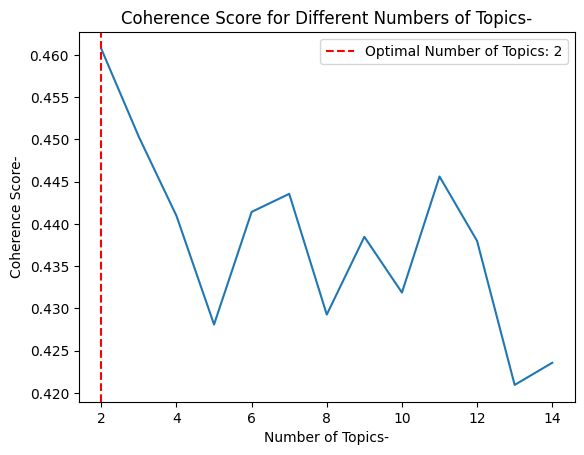

In [ ]:
import pandas as pd
import spacy
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from sklearn.decomposition import TruncatedSVD
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# downloading stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# loading the dataset
df = pd.read_csv("cleaned_imdb_reviews.csv")  # Load the cleaned IMDB reviews dataset
docs = df['Original Review'].tolist()  # Extract the original reviews
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]

# preprocessing reviews
processed_docs = [preprocess(doc) for doc in docs if doc is not None]
bigram = gensim.models.Phrases(processed_docs, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

processed_docs = make_bigrams(processed_docs)

# creating corpus
id2word = corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(text) for text in processed_docs]
tfidf_model = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]
dense_matrix = gensim.matutils.corpus2dense(corpus_tfidf, num_terms=len(id2word)).T

# Find optimal number of topics based on coherence score
def compute_coherence_values(dictionary, corpus, texts, dense_matrix, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        svd_model = TruncatedSVD(n_components=num_topics, random_state=100)
        lsa_topic_matrix = svd_model.fit_transform(dense_matrix)
        topics = [[id2word[word_id] for word_id in np.argsort(-lsa_topic_matrix[:, topic])[:10]] for topic in range(num_topics)]

        # Calculating the coherence score
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        model_list.append(svd_model)
    return model_list, coherence_values

limit = 15
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_docs, dense_matrix=dense_matrix, start=start, limit=limit, step=step)

optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_num_topics = start + optimal_index * step
print(f"Optimal number of topics: {optimal_num_topics}")
lsa_topic_matrix = optimal_model.fit_transform(dense_matrix)
topics = [[id2word[word_id] for word_id in np.argsort(-lsa_topic_matrix[:, topic])[:10]] for topic in range(optimal_num_topics)]

print("Optimal Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")

optimal_coherence_score = coherence_values[optimal_index]
print(f"Optimal LSA Model Coherence Score: {optimal_coherence_score}")

# plot
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics-")
plt.ylabel("Coherence Score-")
plt.title("Coherence Score for Different Numbers of Topics-")
plt.axvline(x=optimal_num_topics, color='r', linestyle='--', label=f'Optimal Number of Topics: {optimal_num_topics}')
plt.legend()
plt.show()


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here
!pip install bertopic
!pip install pandas
!pip install gensim
import json
import pandas as pd
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# dataset
df = pd.read_csv("cleaned_imdb_reviews.csv")  # Load the cleaned IMDB reviews dataset

# extracting reviews from loaded set
docs = df['Original Review'].tolist()

# BERT
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")
topics, probabilities = topic_model.fit_transform(docs)

# Prepare data for coherence score calculation
processed_docs = [doc.split() for doc in docs]  # Split reviews into words
dictionary = Dictionary(processed_docs)  # Create a dictionary
corpus = [dictionary.doc2bow(text) for text in processed_docs]  # Create a corpus

# Calculate coherence score
coherence_model = CoherenceModel(model=topic_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.4f}")

topic_model.visualize_topics()
topic_model.visualize_barchart()
n_topics = len(set(topics))
print(f"Number of topics: {n_topics}")
print("Topic summary:")
for i in range(n_topics):
    topic_info = topic_model.get_topic(i)
    if topic_info:
        topic_words = [word for word, weight in topic_info]
        print(f"Topic {i}: {', '.join(topic_words)}")
    else:
        print(f"Topic {i}: No words were found.")

df = pd.DataFrame({'topic': topics, 'document': docs})
specific_topic = 0
print(f"Documents for topic {specific_topic}:\n{df.loc[df['topic'] == specific_topic]['document'].tolist()}")

hierarchical_topics = topic_model.hierarchical_topics(docs, topics)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherence Score: 1.0000
Number of topics: 19
Topic summary:
Topic 0: the, nefarious, is, and, of, to, that, it, in, movie
Topic 1: the, and, this, of, is, movie, sean, it, to, in
Topic 2: it, the, and, this, you, movie, to, was, is, of
Topic 3: the, it, movie, and, to, is, this, of, you, was
Topic 4: the, they, to, climbing, and, of, it, have, that, she
Topic 5: movie, it, the, this, horror, and, not, is, to, of
Topic 6: it, the, and, to, is, of, that, abortion, this, movie
Topic 7: the, and, it, this, you, of, that, is, to, for
Topic 8: the, fall, of, to, and, is, in, film, that, with
Topic 9: the, of, and, is, demon, this, in, to, it, that
Topic 10: the, and, is, of, it, this, in, to, he, his
Topic 11: edward, the, of, and, was, it, he, in, to, that
Topic 12: my, heights, the, of, this, you, movie, were, and, to
Topic 13: becky, hunter, her, the, to, she, tower, and, of, was
Topic 14: movie, is, and, it, this, to, the, evil, you, we
Topic 15: the, it, tower, and, of, was, movie, to, 

100%|██████████| 17/17 [00:00<00:00, 249.59it/s]


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Import necessary libraries
!pip install pandas spacy gensim nltk pyLDAvis wordcloud seaborn matplotlib

import json
import pandas as pd
import spacy
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
# dataset
df = pd.read_csv("cleaned_imdb_reviews.csv")  # Load the cleaned IMDB reviews dataset

# extracting reviews from loaded set
docs = df['Original Review'].tolist()
# load spaCY model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def preprocess(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha]

# preprocess
processed_docs = [preprocess(doc) for doc in docs if doc is not None]

id2word = corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(text) for text in processed_docs]
num_topics = 10
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=id2word, passes=10, random_state=42) #creating genism
visualization_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(visualization_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The above is to present results of the LDA topic modelling exercise. This is an interactive visualization that includes topics as circles the size of which represents how often the topic appears. The layout represents the degree of topic relatedness so users can easily investigate and analyze the connections of varied topics.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



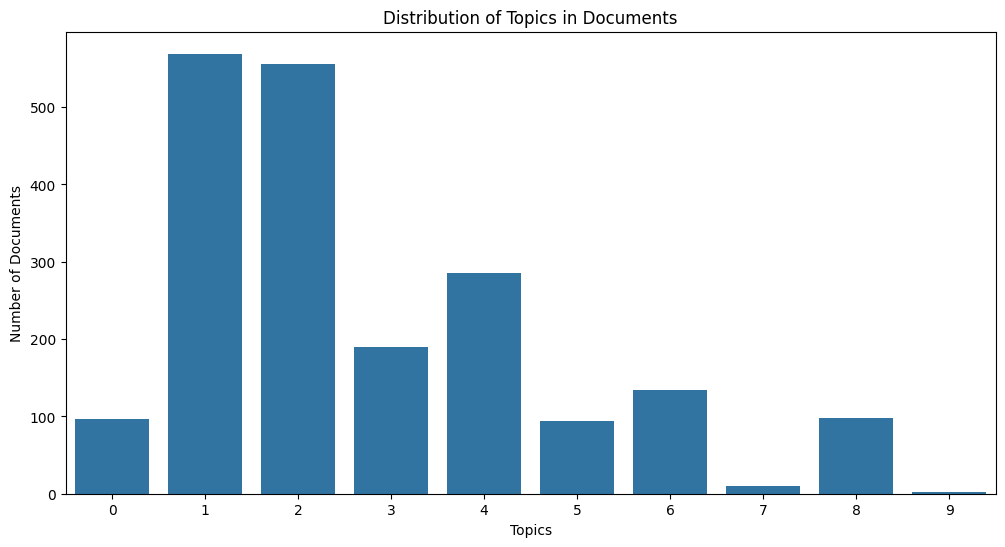

In [ ]:
topic_distribution = lda_model.get_document_topics(corpus)
topic_counts = [0] * num_topics
for doc in topic_distribution:
    for topic, prob in doc:
        topic_counts[topic] += 1
topic_df = pd.DataFrame({'Topic': range(num_topics), 'Count': topic_counts})

plt.figure(figsize=(12, 6))
sns.barplot(x='Topic', y='Count', data=topic_df)
plt.title("Distribution of Topics in Documents")
plt.xlabel("Topics")
plt.ylabel("Number of Documents")
plt.show()


 Topic distribution bar Bar height represents topic prevalence and it helps to find most common topic in  corpus and Balance of topic distribution


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic-Term Matrix:
                 I         a    acting    action       all        an  \
Topic 1   0.022862  0.019527  0.000497  0.000185  0.004453  0.001792   
Topic 2   0.017722  0.024927  0.003348  0.000359  0.004172  0.004978   
Topic 3   0.020296  0.031620  0.001344  0.000505  0.003233  0.005403   
Topic 4   0.005688  0.031807  0.000015  0.000474  0.001730  0.002231   
Topic 5   0.052971  0.023375  0.003050  0.000293  0.003276  0.003432   
Topic 6   0.011154  0.037081  0.001226  0.000863  0.002529  0.001729   
Topic 7   0.035216  0.021200  0.002059  0.000440  0.003354  0.002446   
Topic 8   0.001816  0.007405  0.000188  0.001188  0.001491  0.001139   
Topic 9   0.008122  0.026452  0.002615  0.000610  0.003371  0.005732   
Topic 10  0.000542  0.000618  0.000401  0.000131  0.000581  0.000206   

               and        as        at   atheist  ...    smelly  transmission  \
Topic 1   0.028078  0.003800  0.004269  0.000292  ...  0.000012      0.000012   
Topic 2   0.027976  0.0049

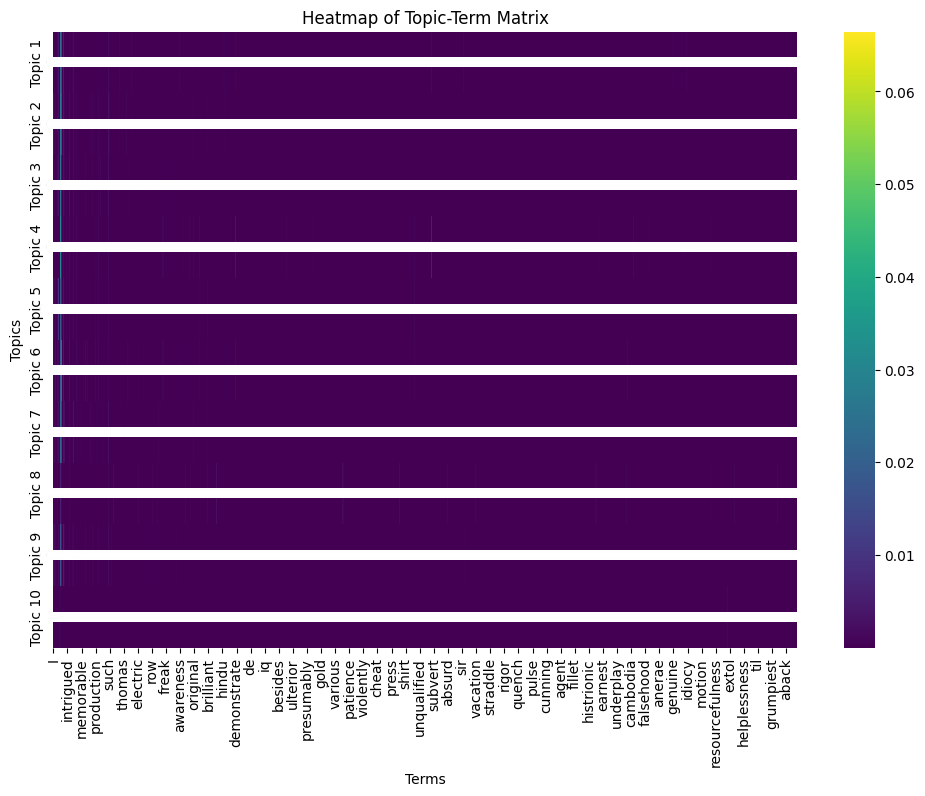

Topic Summary:
Topic 1: the, be, and, to, I, of, a, that, you, do
Topic 2: the, be, and, to, it, a, of, movie, I, that
Topic 3: the, be, a, and, to, of, I, it, in, that
Topic 4: the, a, to, and, of, be, they, tower, in, climb
Topic 5: I, be, the, and, it, movie, a, this, to, of
Topic 6: a, be, and, the, it, you, to, of, this, I
Topic 7: the, be, I, it, to, movie, a, and, this, of
Topic 8: the, and, a, of, to, in, love, resonate, she, life
Topic 9: be, the, a, of, and, movie, it, to, this, in
Topic 10: terrible, ott, blink, laughable, mannerism, turn, off, main, act, feer


In [ ]:

topic_term_matrix = lda_model.get_topics()
topic_term_df = pd.DataFrame(topic_term_matrix, index=[f'Topic {i+1}' for i in range(num_topics)],
                             columns=[id2word[i] for i in range(len(id2word))])

print("Topic-Term Matrix:")
print(topic_term_df)

plt.figure(figsize=(12, 8))
sns.heatmap(topic_term_df, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title("Heatmap of Topic-Term Matrix")
plt.xlabel("Terms")
plt.ylabel("Topics")
plt.show()
print("Topic Summary:")
for i in range(num_topics):
    topic_info = lda_model.show_topic(i, topn=10)
    topic_words = [word for word, _ in topic_info]
    print(f"Topic {i+1}: {', '.join(topic_words)}")


heatmap gives top 10 most probable terms for each topic and helps in topic interpretation and color intensity indicates probability of term in topic


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

# Write your code here
Topic modeling algorithms are individual with topological features as well as different performance profile in
text. In terms of semantic analysing and topic coherence, BERTopic, which is based on BERT’s transformer structure
perform consistently better than traditional methods. This results in more meaningful and nuanced topics since
the technique addressed contextual relationship and polysemy. But, the ability to produce higher order polynomials
results in higher order of accuracy is the trade-off against computational complexity and poor parallelizability.
LDA being a probabilistic generative model provides adequate and realistic solution to the practice problems
while maintaining good quality results. The learnt topics are easily interpretable with clear probabilistic
relationships and offers high compatibility with traditional vector space models based on word frequencies.
However, it does not perform as well on the identification of semantic similarities and connections such as
BERTopic does, but its efficiency and relatively low computational overhead make it more convenient for use in
a large number of tasks. LSA in this strategy is considerably efficient and scalable with computational activities
done by singular value decomposition. However, its linear algebra approach results in less coherent topics and
difficulties in understanding polysemy and various degrees of connexion between words. It is most useful for situations where a fast overview of a big data set is needed, or when a fairly imprecise topic assessment will suffice.
A technique akin to topic modeling is possible with Doc2Vec since it is primarily a method of document embedding. Though it generates better document representations it sometimes generates fewer comprehensible topics than LDA or BERTopic. However, its strength is best seen in the document similarity tasks rather than the pure topic modeling.
The choice between these algorithms ultimately depends on specific needs: BERTopic for highest quality, LDA for balancing between quality and time, LSA for time efficient and Doc2Vec for when documents play an important role.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning experience- it is fascinating to learn about how these algorithms extract patter from text , i have
gained hands on problem solving skills from this
Challenges encountered- parameter tuning is tricky and also found difficulty in implementing coherence
Releavance to field of study- highly relevant to nlp, it helps to understand about topic modelling from large
piles of text data.



'''